### Effective Key Transition : Analysis 2

- key position adjusted in increments of 0.25 mm
- vernier scale and infrared sensor used for key increment calibration
- oscilloscope voltage measurement used for pressure calibration
- key manipulated by mechanical device with **point impact** finger

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import audacity
import TransferFunctions as tf
import SoundUtils as sut
import scipy.signal as sig
import peakutils

%matplotlib notebook

In [13]:
runnames = np.arange(300, 675, 25)
runs = 15

dfiles = []
for acq in range(3):
    dfiles.append([])
    for rn in runnames:
        acqfiles = "DATA/MAIN_4500rpm/freqchange/trill/%d_%d.aup" % (rn, acq)
        dfiles[acq].append(acqfiles)
        
# reffile = "DATA/microclose/%drpm/2tieclip_reference_sines.aup"

In [14]:
gamma=1.4
P_a=101000
rho_a=1.22
c = 343

chimney=0.0139
bore=0.0186
foot=0.16

# V=(np.pi*bore**2/4)*foot
# const = c**2/(4*np.pi**2*V)

In [15]:
def effective_transition2(aupfile, freqIR, nfft, ch_labium=0, ch_int=1, ch_IR=2, ch_ext=3):
    '''
    Main routine for Effective Key Transition analysis 2.
    Uses spectrum analysis to determine when
    effective key state changes from open to closed.
    
    Input
    -----
    aupfile : audacity project file
    ch_labium, ch_int, ch_IR, ch_ext : (optional) channel numbers
        for labium mic, infrared signal, internal mic and external mic tracks
    IRfreq : frequency of infrared signal modulation
    nfft : window length for transfer function calculation
    
    Output
    ------
    returns a dictionary of the data with the following keys:
    'tf' = transfer function (internal/external response)
    'coh' = coherence (internal vs external)
    'int_mic' = internal response
    'ext_mic' = external responce
    '''    
    auf = audacity.Aup(aupfile)
    print(aupfile)
    sr = auf.rate
    rawdata = []
    maxlen = 0
    for chno in range(auf.nchannels):
        rawdata.append(auf.get_channel_data(chno))
        maxlen = max(maxlen, len(rawdata[-1]))

    data = np.zeros((len(rawdata), maxlen))
    for chno, chdata in enumerate(rawdata):
        data[chno,:len(chdata)] = chdata
        
    lab_ = data[ch_labium,:]
    int_ = data[ch_int,:]
    ext_ = data[ch_ext,:]
    IR = data[ch_IR,:]
    
    datadict = {}
    for chname, chdata in zip(['lab_', 'int_', 'ext_'], [lab_, int_, ext_]):
#         ampl_RMS = np.sqrt(np.mean((chdata-np.mean(chdata))**2))
        spectrum = np.fft.rfft(chdata)
#         freqpeaks = peakutils.indexes(spectrum, ...)
#         intensity = np.array([2*np.pi**2*f**2*amplitude**2*rho_a*c for f in freqpeaks])
#         datadict['%samplitude'%chname] = ampl_RMS
#         datadict['%sspectrum'%chname] = spectrum
        power = 20*np.log10(np.abs(spectrum))
        freqs = np.linspace(0, sr/2, len(power))
        datadict['%syspec'%chname] = power
        datadict['%sxspec'%chname] = freqs
    
    datadict['ir_RMS'] = np.sqrt(np.mean((IR-np.mean(IR))**2))
    return datadict

In [16]:
freqIR = 9820
nfft = 1024*2

In [17]:
results = []
for acqno, acqfiles in enumerate(dfiles):
    results.append([])
    for file in acqfiles:
        filedata = effective_transition2(file, freqIR, nfft)
        results[acqno].append(filedata)

DATA/MAIN_4500rpm/freqchange/trill/300_0.aup
DATA/MAIN_4500rpm/freqchange/trill/325_0.aup
DATA/MAIN_4500rpm/freqchange/trill/350_0.aup
DATA/MAIN_4500rpm/freqchange/trill/375_0.aup
DATA/MAIN_4500rpm/freqchange/trill/400_0.aup
DATA/MAIN_4500rpm/freqchange/trill/425_0.aup
DATA/MAIN_4500rpm/freqchange/trill/450_0.aup
DATA/MAIN_4500rpm/freqchange/trill/475_0.aup
DATA/MAIN_4500rpm/freqchange/trill/500_0.aup
DATA/MAIN_4500rpm/freqchange/trill/525_0.aup
DATA/MAIN_4500rpm/freqchange/trill/550_0.aup
DATA/MAIN_4500rpm/freqchange/trill/575_0.aup
DATA/MAIN_4500rpm/freqchange/trill/600_0.aup
DATA/MAIN_4500rpm/freqchange/trill/625_0.aup
DATA/MAIN_4500rpm/freqchange/trill/650_0.aup
DATA/MAIN_4500rpm/freqchange/trill/300_1.aup
DATA/MAIN_4500rpm/freqchange/trill/325_1.aup
DATA/MAIN_4500rpm/freqchange/trill/350_1.aup
DATA/MAIN_4500rpm/freqchange/trill/375_1.aup
DATA/MAIN_4500rpm/freqchange/trill/400_1.aup
DATA/MAIN_4500rpm/freqchange/trill/425_1.aup
DATA/MAIN_4500rpm/freqchange/trill/450_1.aup
DATA/MAIN_

<IPython.core.display.Javascript object>


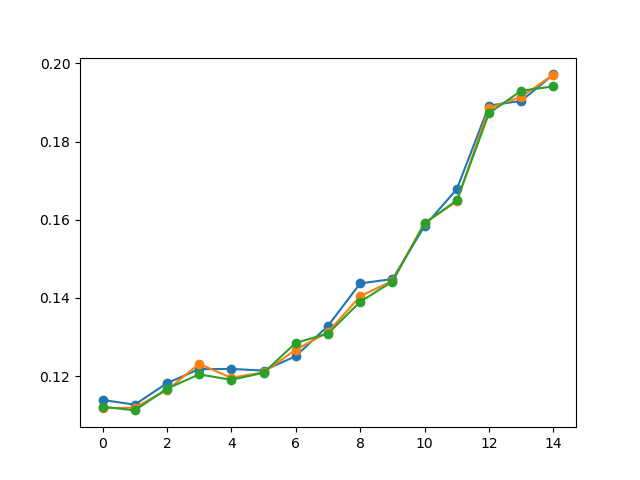

In [20]:
fig = plt.figure()
for acqresults in results:
    plt.plot([result['ir_RMS'] for result in acqresults], 'o-')

<IPython.core.display.Javascript object>


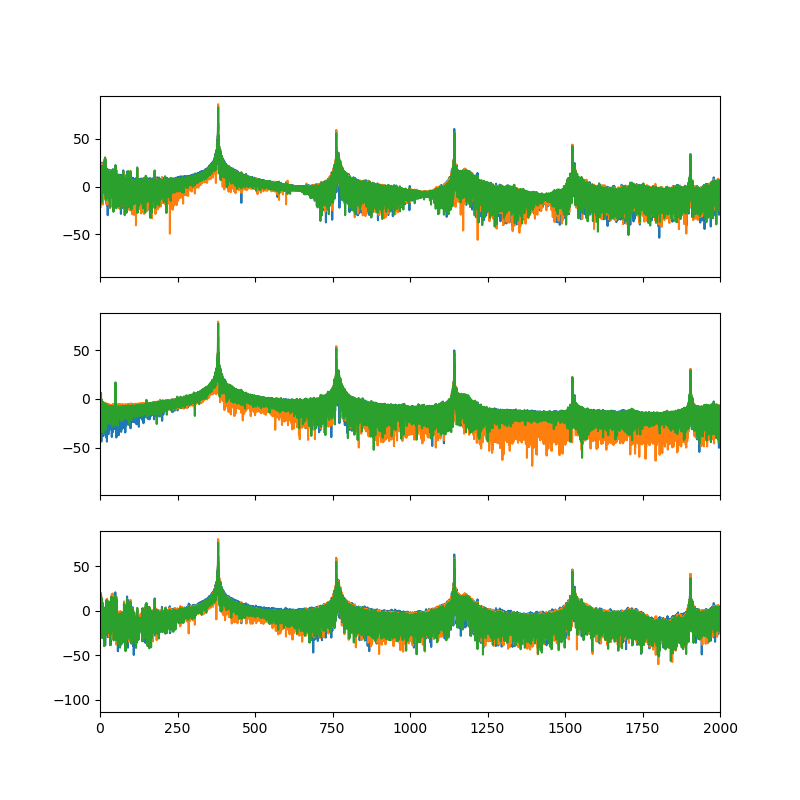

In [34]:
# sr = 44100
fig, ax = plt.subplots(3,sharex=True, figsize=((8,8)))
for acqresults in results:
    ax[0].set_xlim(0, 2000)
    ax[0].plot(acqresults[0]['lab_xspec'], acqresults[0]['lab_yspec'])
    ax[1].plot(acqresults[0]['int_xspec'], acqresults[0]['int_yspec'])
    ax[2].plot(acqresults[0]['ext_xspec'], acqresults[0]['ext_yspec'])

<IPython.core.display.Javascript object>


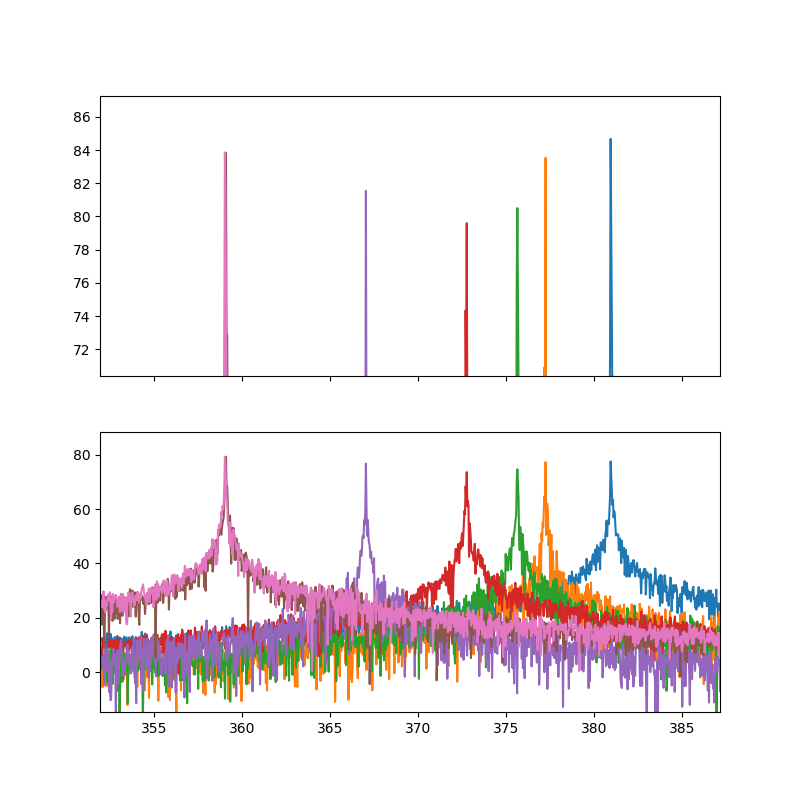

<IPython.core.display.Javascript object>


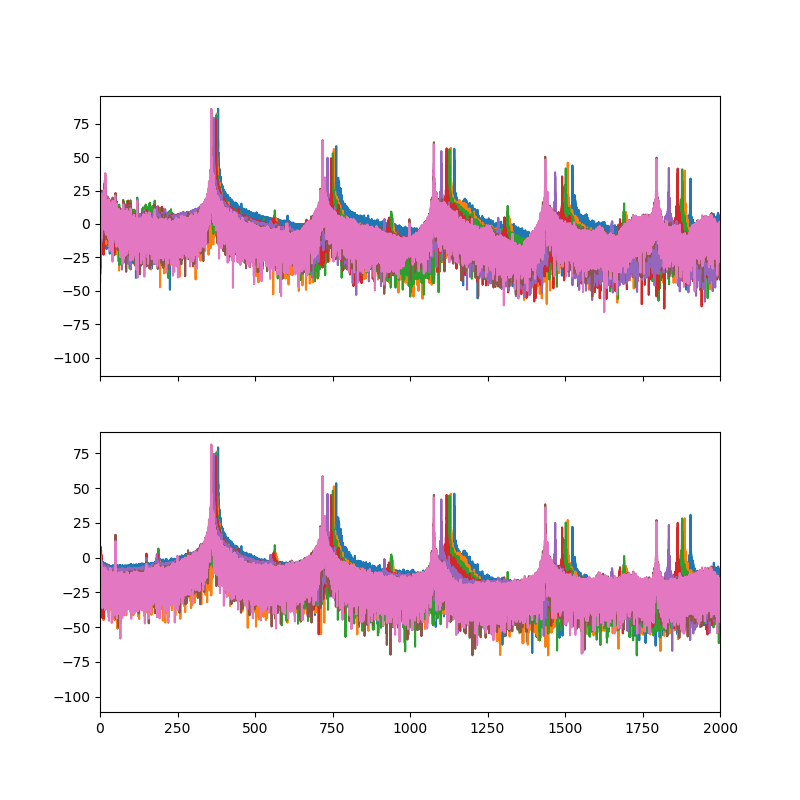

<IPython.core.display.Javascript object>


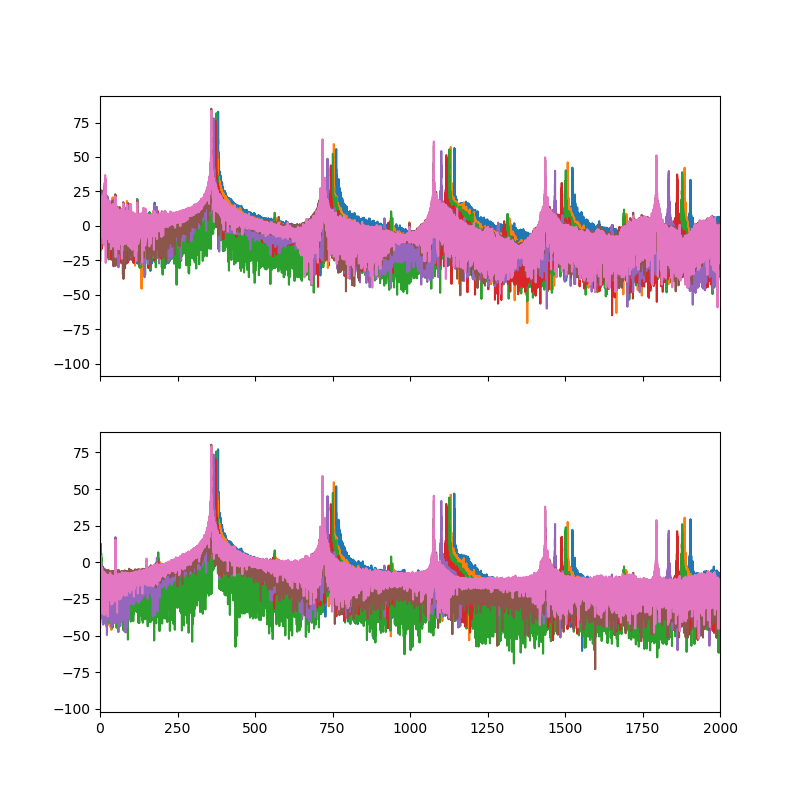

In [22]:
for acqresults in results:
    fig,ax = plt.subplots(2,sharex=True, figsize=((8,8)))
#     for r in range(runs):
    for r in [0, 8, 9, 10, 11, 12, 13]:
        ax[0].set_xlim(0, 2000)
        ax[0].plot(acqresults[r]['lab_xspec'], acqresults[r]['lab_yspec'])
        ax[1].plot(acqresults[r]['int_xspec'], acqresults[r]['int_yspec'])
#         ax[2].plot(acqresults[r]['ext_xspec'], acqresults[r]['ext_yspec'])

<IPython.core.display.Javascript object>


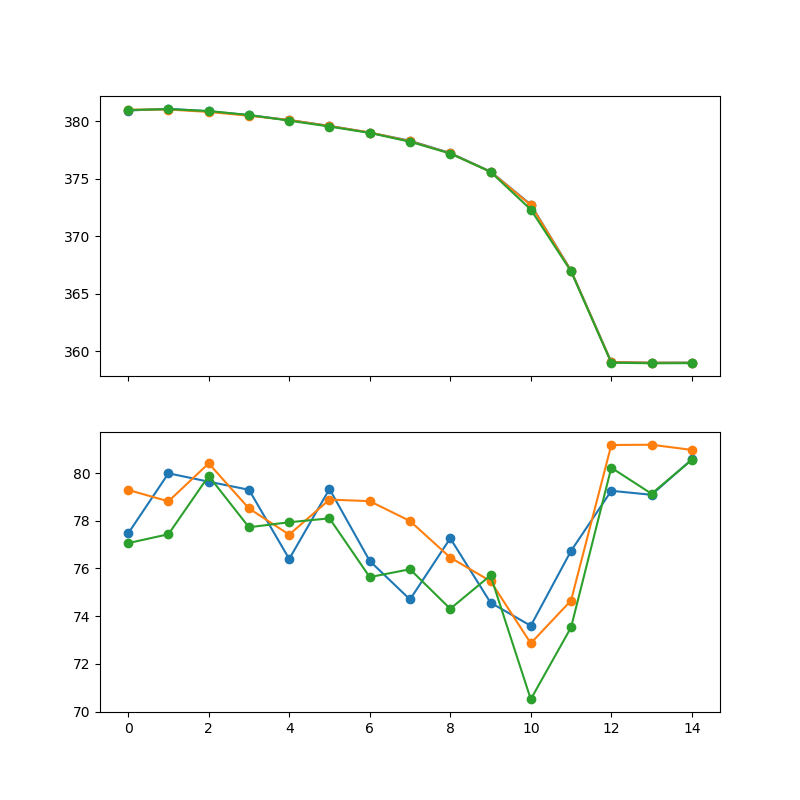

In [33]:
allfpeaks = []
alldbpeaks = []
for acqresults in results:
    incrs = [i for i in range(runs)]
    DBpeaks = []
    Fpeaks = []
    allfpeaks.append(Fpeaks)
    alldbpeaks.append(DBpeaks)
    for r in incrs:
        fpeak = peakutils.indexes(acqresults[r]['int_yspec'], thres=0.9, min_dist=150)
        DBpeaks.extend(acqresults[r]['int_yspec'][fpeak])
        Fpeaks.extend(acqresults[r]['int_xspec'][fpeak])

fig,ax = plt.subplots(2, sharex=True, figsize=((8,8)))
for i in range(len(allfpeaks)):
    ax[0].plot(incrs, allfpeaks[i], 'o-')
#     ax[0].set_label('Frequency vs closing')
    ax[1].plot(incrs, alldbpeaks[i], 'o-')
#     ax[1].set_label('dB vs closing')
#     plt.legend(loc='best', ncol=3)